In [2]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
    parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
    sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

    if '%s/uoicorr' % p not in sys.path:
        sys.path.append('%s/uoicorr' % p)
    if '%s/PyUoI' % p not in sys.path:
        sys.path.append('%s/PyUoI' % p)

else:
    # And standard list of subdirectories
    if '%s\\pyuoi' % p not in sys.path:
        sys.path.append('%s\\pyuoi' % p)
    if '%s\\uoicorr' % p not in sys.path:
        sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir
from utils import FNR, FPR, selection_accuracy

In [3]:
import pdb
from utils import gen_covariance
from cov_scaling import weighted_degree_distribution

In [ ]:
# Load both the block_correlation and exponential falloff data and see whether we can get the number of false negatives/positivies,
# or alternatively, the selection accuracy collapse to a single curve

In [6]:
dat_block_lasso = postprocess_dir('C:\\Users\\ANkit\\nse\\uoicorr\\data\\01102019', True)
dat_block_uoien = postprocess_dir('C:\\Users\\Ankit\\nse\\uoicorr\\data\\01132019b', True)
dat_block_en = postprocess_dir('C:\\Users\\Ankit\\nse\\uoicorr\\data\\01142019b', True)

(120, 16)
(120, 16)
(120, 16)


In [7]:
dat_block_exp = postprocess_dir('C:\\Users\\Ankit\\nse\\uoicorr\\data\\01162019')

(180, 21)


In [ ]:
# Stick to just UoI_Lasso in the first case.

In [8]:
lasso_exp = dat_block_exp.loc[dat_block_exp['exp_type'] == 'UoILasso']

In [34]:
lasso_block_fp = np.zeros((5, 24))
lasso_block_fn = np.zeros((5, 24))
lasso_exp_fp = np.zeros((5, 12))
lasso_exp_fn = np.zeros((5, 12))

cov_dd_block = np.zeros(24)
cov_dd_exp = np.zeros(12)

In [43]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
for i, s in enumerate(sparsity):
    d1 = dat_block_lasso.loc[dat_block_lasso['sparsity'] == s]
    d2 = lasso_exp.loc[lasso_exp['sparsity'] == s]
    # Reform the covariance matricies that generated the data:
    for j in range(d1.shape[0]):
        lasso_block_fp[i, j] = np.mean(d1.iloc[j].fp);
        lasso_block_fn[i, j] = np.mean(d1.iloc[j].fn);

        if i == 0:
            cov = regen_block_covariance(d1.iloc[j])
            cov_dd_block[j] = np.mean(weighted_degree_distribution(cov))
    for j in range(d2.shape[0]):
        lasso_exp_fp[i, j] = np.mean(d2.iloc[j].fp)
        lasso_exp_fn[i, j] = np.mean(d2.iloc[j].fn)
    
        if i == 0:
            cov = regen_exp_covariance(d2.iloc[j])
            cov_dd_exp[j] = np.mean(weighted_degree_distribution(cov))

In [24]:
def regen_block_covariance(d):
    # Get the block size and block correlation
    block_size = d.block_size
    if type(d.cov_params) == dict:
        corr = d.cov_params['correlation']
    else:
        corr = d.cov_params
    n_features = d.n_features
    return gen_covariance('block', n_features = n_features, block_size = block_size, correlation=corr)

In [20]:
def regen_exp_covariance(d):
    n_features = d.n_features
    L = d.cov_params['L']
    return gen_covariance('falloff', n_features = n_features, L = L)

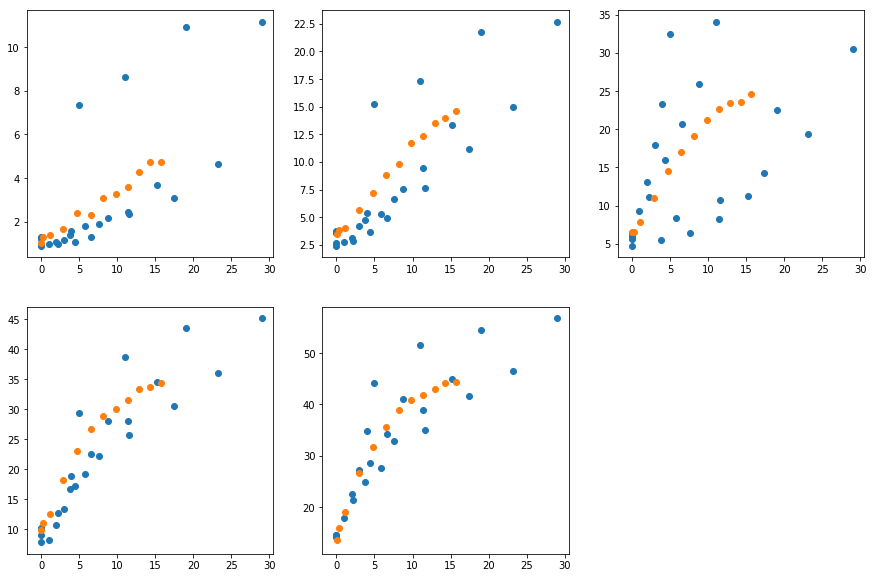

In [54]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, s in enumerate(sparsity):
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.scatter(cov_dd_block, lasso_block_fn[i, :])
    a.scatter(cov_dd_exp, lasso_exp_fn[i, :])
    
fig.delaxes(ax[1, 2])


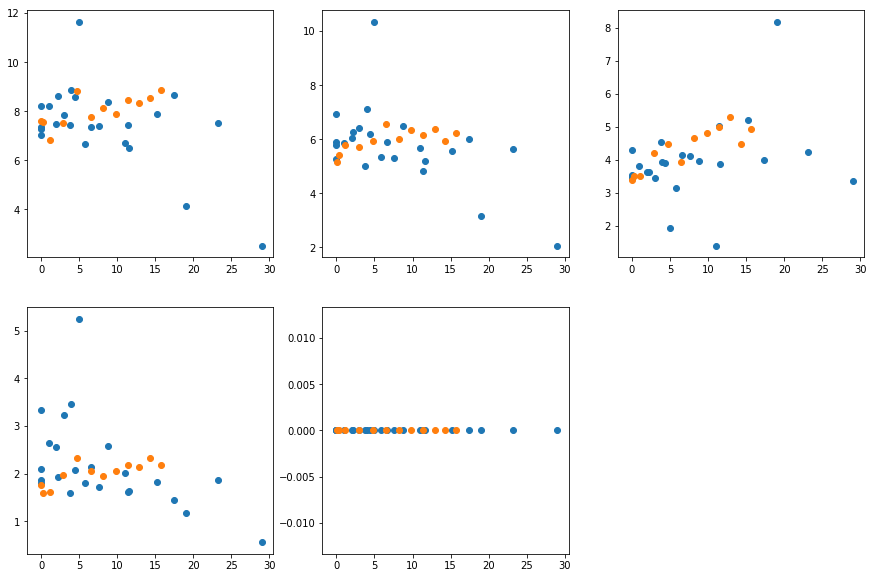

In [55]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, s in enumerate(sparsity):
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.scatter(cov_dd_block, lasso_block_fp[i, :])
    a.scatter(cov_dd_exp, lasso_exp_fp[i, :])
    
fig.delaxes(ax[1, 2])


In [5]:
dat_block = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\02082019b')
dat_exp = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\02082019')
dat_interp = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\02082019c')

(420, 28)
(180, 28)
(165, 28)


In [8]:
dat_block_lasso = dat_block.loc[dat_block['exp_type'] == 'UoILasso']
print(dat_block_lasso.shape)
dat_exp_lasso = dat_exp.loc[dat_exp['exp_type'] == 'UoILasso']
print(dat_exp_lasso.shape)
dat_interp_lasso = dat_interp[dat_interp['exp_type'] == 'UoILasso']
print(dat_interp_lasso.shape)

(140, 28)
(60, 28)
(55, 28)


In [74]:
from cov_scaling import weighted_clustering_coefficient1

In [78]:
lasso_block_fp = np.zeros((5, 28))
lasso_block_fn = np.zeros((5, 28))
lasso_block_sa = np.zeros((5, 28))
lasso_exp_fp = np.zeros((5, 12))
lasso_exp_fn = np.zeros((5, 12))
lasso_exp_sa = np.zeros((5, 12))
lasso_interp_fp = np.zeros((5, 11))
lasso_interp_fn = np.zeros((5, 11))
lasso_interp_sa = np.zeros((5, 11))

# Record mean and variance of the degree distribution
cov_dd_block1 = np.zeros(28)
cov_dd_exp1 = np.zeros(12)
cov_dd_interp1 = np.zeros(11)
cov_dd_block2 = np.zeros(28)
cov_dd_exp2 = np.zeros(12)
cov_dd_interp2 = np.zeros(11)

# Cluster coefficient
cov_cl_block = np.zeros(28)
cov_cl_exp = np.zeros(12)
cov_cl_interp = np.zeros(11)

In [91]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
for i, s in enumerate(sparsity):
    d1 = dat_block_lasso.loc[dat_block_lasso['sparsity'] == s]
    d2 = dat_exp_lasso.loc[dat_exp_lasso['sparsity'] == s]
    d3 = dat_interp_lasso.loc[dat_interp_lasso['sparsity'] == s]
    # Re-create the covariance matricies that generated the data:
    for j in range(d1.shape[0]):
        lasso_block_fp[i, j] = np.mean(FPR(d1.iloc[j].betas, d1.iloc[j].beta_hats));
        lasso_block_fn[i, j] = np.mean(FNR(d1.iloc[j].betas, d1.iloc[j].beta_hats));
        lasso_block_sa[i, j] = np.mean(selection_accuracy(d1.iloc[j].betas, d1.iloc[j].beta_hats))
        if i == 0:
            cov = regen_block_covariance(d1.iloc[j])
            dd = weighted_degree_distribution(cov)
            cov_dd_block1[j] = np.mean(dd)
            cov_dd_block2[j] = np.var(dd)
            cov_cl_block[j] = np.mean(weighted_clustering_coefficient1(cov))
    for j in range(d2.shape[0]):
        lasso_exp_fp[i, j] = np.mean(FPR(d2.iloc[j].betas, d2.iloc[j].beta_hats));
        lasso_exp_fn[i, j] = np.mean(FNR(d2.iloc[j].betas, d2.iloc[j].beta_hats));
        lasso_exp_sa[i, j] = np.mean(selection_accuracy(d2.iloc[j].betas, d2.iloc[j].beta_hats))
        if i == 0:
            cov = regen_exp_covariance(d2.iloc[j])
            dd = weighted_degree_distribution(cov)
            cov_dd_exp1[j] = np.mean(dd)
            cov_dd_exp2[j] = np.var(dd)
            cov_cl_exp[j] = np.mean(weighted_clustering_coefficient1(cov))
    for j in range(d3.shape[0]):
        lasso_interp_fp[i, j] = np.mean(FPR(d3.iloc[j].betas, d3.iloc[j].beta_hats));
        lasso_interp_fn[i, j] = np.mean(FNR(d3.iloc[j].betas, d3.iloc[j].beta_hats));
        lasso_interp_sa[i, j] = np.mean(selection_accuracy(d3.iloc[j].betas, d3.iloc[j].beta_hats))
        if i == 0:
            dd = weighted_degree_distribution(np.array(d3.iloc[j].cov_params['sigma']))
            cov_dd_interp1[j] = np.mean(dd)
            cov_dd_interp2[j] = np.var(dd)
            cov_cl_interp[j] = np.mean(weighted_clustering_coefficient1(cov))


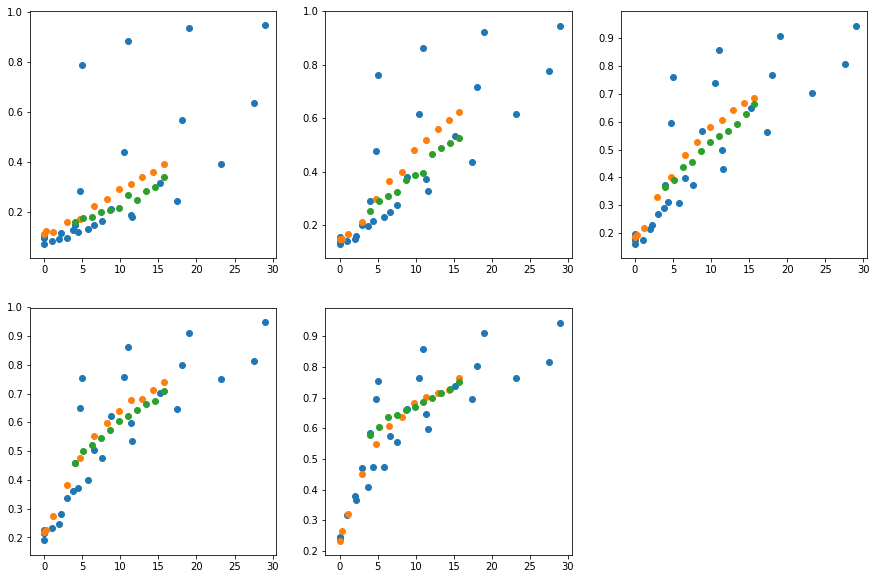

In [42]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, s in enumerate(sparsity):
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.scatter(cov_dd_block, lasso_block_fn[i, :])
    a.scatter(cov_dd_exp, lasso_exp_fn[i, :])
    a.scatter(cov_dd_interp, lasso_interp_fn[i, :])
fig.delaxes(ax[1, 2])


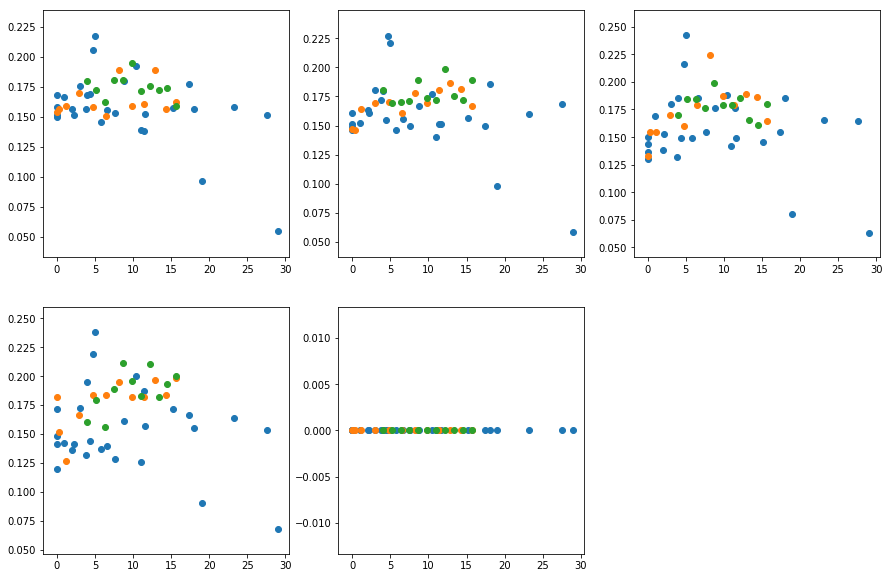

In [43]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, s in enumerate(sparsity):
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.scatter(cov_dd_block, lasso_block_fp[i, :])
    a.scatter(cov_dd_exp, lasso_exp_fp[i, :])
    a.scatter(cov_dd_interp, lasso_interp_fp[i, :])
fig.delaxes(ax[1, 2])


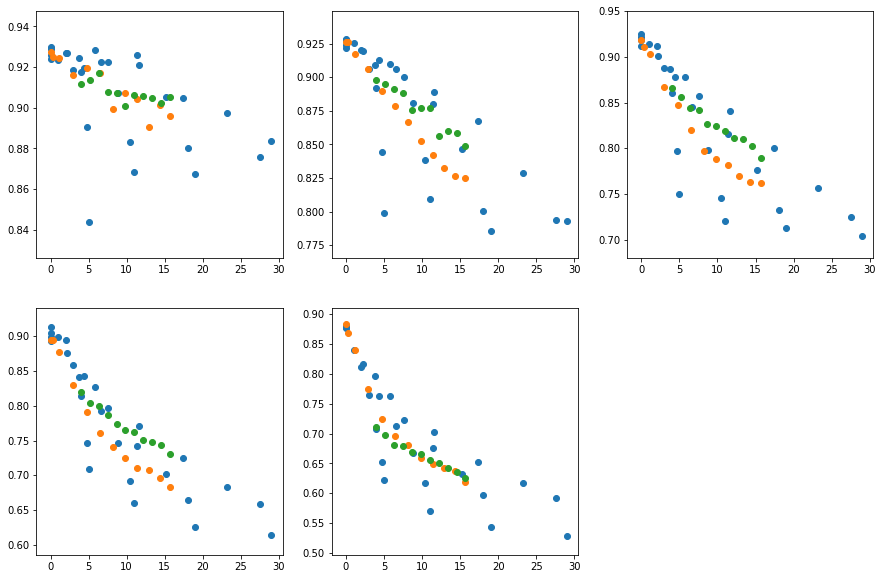

In [44]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, s in enumerate(sparsity):
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.scatter(cov_dd_block, lasso_block_sa[i, :])
    a.scatter(cov_dd_exp, lasso_exp_sa[i, :])
    a.scatter(cov_dd_interp, lasso_interp_sa[i, :])
fig.delaxes(ax[1, 2])


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [48]:
# Regress selection accuracy against various numbers of statistics of the degree distribution
lin_model = LinearRegression(fit_intercept = True, normalize = True)

In [60]:
X1 = np.concatenate([cov_dd_block1, cov_dd_exp1, cov_dd_interp1]) 
X2 = np.concatenate([np.stack([cov_dd_block1, cov_dd_block2], axis = -1), np.stack([cov_dd_exp1, cov_dd_exp2], axis = -1), 
                    np.stack([cov_dd_interp1, cov_dd_interp], axis = -1)])
y_sa = np.concatenate([lasso_block_sa, lasso_exp_sa, lasso_interp_sa], axis = 1)

In [64]:
cv1 = cross_val_score(lin_model, X1.reshape(-1, 1), y_sa[4, :].reshape(-1, 1), cv = 5)
cv2 = cross_val_score(lin_model, X2, y_sa[4, :].reshape(-1, 1), cv = 5)

Answer: Factoring in the higher order statistic does not explain more variance in the selection accuracy performance

### Clustering Coefficient

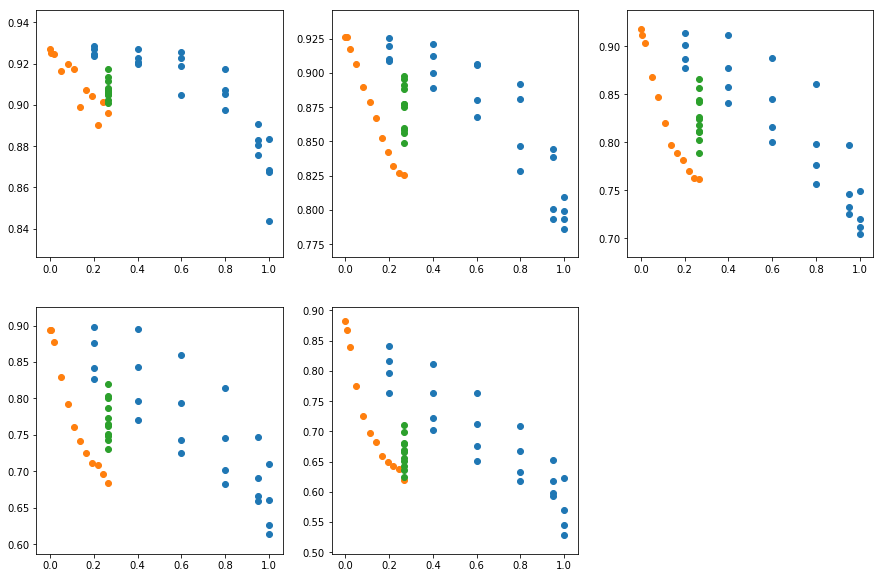

In [92]:
sparsity = [0.2, 0.4, 0.6, 0.8, 1]
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, s in enumerate(sparsity):
    
    a = ax[np.unravel_index(i, (2, 3))]
    a.scatter(cov_cl_block, lasso_block_sa[i, :])
    a.scatter(cov_cl_exp, lasso_exp_sa[i, :])
    a.scatter(cov_cl_interp, lasso_interp_sa[i, :])
fig.delaxes(ax[1, 2])
